In [1]:
import bezmerizing

In [2]:
import random

In [3]:
from flat import document, shape, rgb, rgba

In [4]:
from numpy.random import uniform, normal, choice

In [5]:
from scipy.stats import truncnorm
def t_normal(a, b, mu, sigma):
    tn = truncnorm((a-mu)/sigma, (b-mu)/sigma, loc=mu, scale=sigma)
    return tn.rvs(1)[0]

In [6]:
import numpy as np

In [7]:
from IPython.display import SVG, display
def show(page):
    display(SVG(page.svg()))

In [8]:
from bezmerizing import Polyline

Write some random polygones

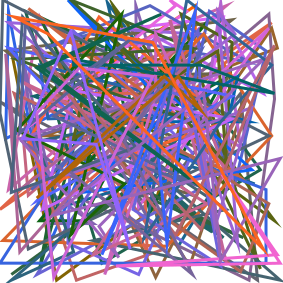

In [9]:
d = document(100, 100, 'mm')
page = d.addpage()

for i in range(80):
    x1 = random.randrange(100)
    y1 = random.randrange(100)
    x2 = random.randrange(100)
    y2 = random.randrange(100)
    x3 = random.randrange(100)
    y3 = random.randrange(100)
    x4 = random.randrange(100)
    y4 = random.randrange(100)
    r = random.randrange(255)
    b = random.randrange(255)
    brush = shape().stroke(rgb(r, 100, b)).width(3)
    line_obj = brush.polygon(Polyline([[x1, y1], [x2, y2], [x3, y3], [x4, y4]]))
    page.place(line_obj)
show(page)

In [10]:
pts = []
for i in range(10):
    pts.append([uniform(-0.5, 0.5), uniform(-0.2, 0.2)])
rand_pline = Polyline(pts)

In [13]:
def uniform_glyph_baseline(n=10):
    pts = [[-0.4, 0.5], [0.4, 0.5]]
    for i in range(n):
        pts.append([uniform(-0.5, 0.5), uniform(-0.5, 0.5)])
    rand_pline = Polyline(pts)
    return rand_pline

In [14]:
pline = uniform_glyph_baseline().scale(40).translate(20, 20)

In [21]:
def make_scribble(width, height, steps, stddev=0):
    pts = []
    for i in range(steps):
        x = ((width / steps) * i) + normal(0, stddev)
        y = normal(0, height)
        pts.append([x, y])
    return Polyline(pts)

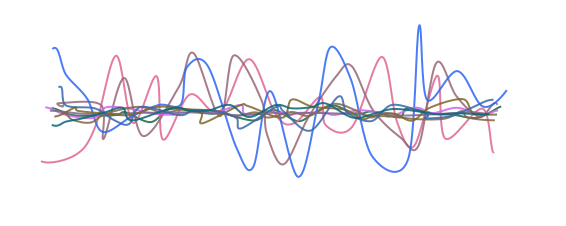

In [115]:
size = 200
d = document(200, 80, 'mm')
page = d.addpage()
row_n = 16
for i in range(10):
    x = 180
    y = random.lognormvariate(0.5,1)
    r = random.randrange(255)
    b = random.randrange(255)
    scribble_poly = make_scribble(width=x,
                    height= y,
                    steps=25,
                    stddev=2)
    curve_figure = shape().stroke(rgba(r, 105, b, 220)).width(2)
    curve = curve_figure.path(scribble_poly.smooth_path().translate(10, 40))
    page.place(curve)
show(page)

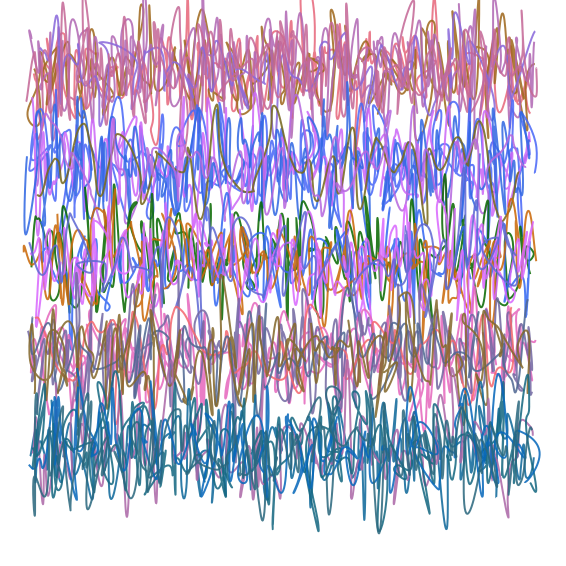

In [167]:
size = 200
d = document(size, size, 'mm')
page1 = d.addpage()
line_figure = shape().stroke(rgba(0, 255, 0, 255)).width(1)
row_n = 5
for i in range(row_n):
    for j in range(5):
        r = random.randrange(255)
        b = random.randrange(255)
        scribble_poly = make_scribble(
                        width=size-20,
                        height=(size/row_n)*0.25,
                        steps=int(uniform(25, 250)),
                        stddev=uniform(2))
        curve_figure = shape().stroke(rgba(r, 105, b, 220)).width(2)
        scribble_poly_tr = scribble_poly.translate(
            10, 25 + (i*size/(row_n+1))) # row_n + 1 to leave some space at the bottom
        curve = curve_figure.path(scribble_poly_tr.smooth_path(tightness=-0.5))
        page1.place(curve)
show(page1)

In [168]:
page1.svg()
with open("01.svg", "wb") as fh:
    fh.write(page1.svg())

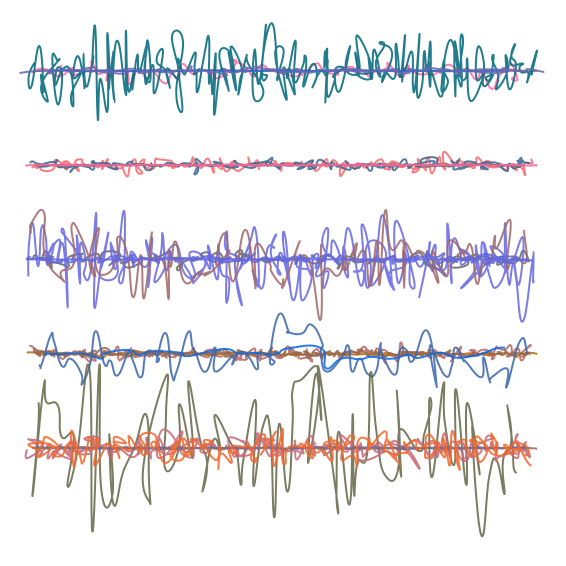

In [165]:
size = 200
d = document(size, size, 'mm')
page = d.addpage()
line_figure = shape().stroke(rgba(0, 255, 0, 255)).width(1)
row_n = 5
for i in range(row_n):
    for j in range(5):
        y = random.lognormvariate(0,1.5)
        r = random.randrange(255)
        b = random.randrange(255)
        scribble_poly = make_scribble(
                        width=size-20,
                        height=y,
                        steps=int(uniform(25, 250)),
                        stddev=uniform(2))
        curve_figure = shape().stroke(rgba(r, 105, b, 220)).width(2)
        scribble_poly_tr = scribble_poly.translate(
            10, 25 + (i*size/(row_n+1))) # row_n + 1 to leave some space at the bottom
        curve = curve_figure.path(scribble_poly_tr.smooth_path(tightness=-0.5))
        page.place(curve)
show(page)

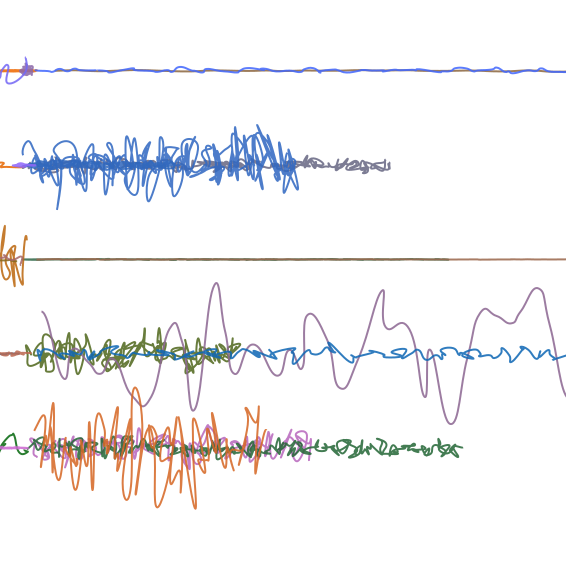

In [186]:
size = 200
d = document(size, size, 'mm')
page2 = d.addpage()
line_figure = shape().stroke(rgba(0, 255, 0, 255)).width(1)
row_n = 5
for i in range(row_n):
    for j in range(5):
        x = random.normalvariate(100,200)
        y = random.lognormvariate(0,1.5)
        r = random.randrange(255)
        b = random.randrange(255)
        scribble_poly = make_scribble(
                        width=x,
                        height=y,
                        steps=int(uniform(25, 250)),
                        stddev=uniform(2))
        curve_figure = shape().stroke(rgba(r, 105, b, 220)).width(2)
        scribble_poly_tr = scribble_poly.translate(
            10, 25 + (i*size/(row_n+1))) # row_n + 1 to leave some space at the bottom
        curve = curve_figure.path(scribble_poly_tr.smooth_path(tightness=-0.5))
        page2.place(curve)
show(page2)

In [187]:
page2.svg()
with open("3.svg", "wb") as fh:
    fh.write(page2.svg())